# Setup

In [2]:
include("LazyMatrices.jl")
include("TurtleSearch.jl")
# using .LazyMatrices, .TurtleSearch
import .LazyMatrices as lm
import .TurtleSearch as tt

In [111]:
include("eom.jl")
import .GoldbergerWiseEoM as eom
# using .GoldbergerWiseEoM

In [4]:
using Plots, LaTeXStrings

# Specify the shooting function

In [5]:
function g2_m_perturb(l2, xrange, u=eom.u, k=eom.k, yₘ=eom.yₘ)
    g2s0 = exp10.(range(xrange..., 100))
    m2s0 = 4l2*(2k+u)*u^2/(3k)*(1-exp(2k*yₘ))/(1-exp((4k+2u)*yₘ)) * (1 .- (4k+2u) ./g2s0)
    # ms0 = sqrt.(m2s0)
    return g2s0, m2s0
end

g2_m_perturb (generic function with 4 methods)

In [112]:
function nextpose(poses, m)
    t = tt.Turtles(max(poses...))
    inds = tt.bisearch(t, m)
    xs = [m.xaxis(inds[1])]
    ys = [m.yaxis(inds[2])]
    while !isnothing(tt.next!(t, m))
        inds = tt.bisearch(t, m)
        push!(xs,m.xaxis(inds[1]))
        push!(ys,m.yaxis(inds[2]))
    end
    poses = tt.findfirstseed!(m, map(x->x+CartesianIndex(0,1), poses)...)
    return xs, ys, poses
end
function g2_m2_numerical(l2, xrange, yrange, u=eom.u, k=eom.k, φP=1e-1; ylogscaled = false, nSeeds = 1)
    paramsearch_g2_m2 = eom.paramsearch(l2=l2, φP=φP)
    m = lm.LazyMatrix(zeros(100,100), paramsearch_g2_m2, xrange, yrange, ylogscaled = ylogscaled)
    poses = tt.findfirstseed!(m, CartesianIndex(1, 1), CartesianIndex(1, 2))
    @assert !isnothing(poses) "no seed found"
    g2_m2 = []
    for i = 1:nSeeds
        g2s, m2s, poses = nextpose(poses, m)
        push!(g2_m2, (g2s, m2s))
    end
    return g2_m2
end

g2_m2_numerical (generic function with 4 methods)

In [97]:
function getφ(m2, l2, g2; FP=1., φP=1.)
    params = (m2, l2, g2)
    Fsol = eom.solveODE(FP, φP, params)
    eom.getφ(Fsol, params)
end

getφ (generic function with 1 method)

In [98]:
m2min = -4*(2eom.k + eom.u)*eom.u^3/(3eom.k * (4eom.k + eom.u))*(1-exp(2eom.k*eom.yₘ))/(1-exp((4eom.k+2eom.u)*eom.yₘ))

-7.750892584744035e-15

# Over/under shooting process

In [117]:
g2_m2 = g2_m2_numerical(1e-3, (log10(1e-1eom.γ²₀), 4), (-16, -2), eom.u, eom.k, 1e-5, nSeeds=1, ylogscaled=true)

(xs(1), xs(size(data, 1)), ys(1), ys(size(data, 2))) = (1.5, 10000.0, 1.0e-16, 0.01)

1-element Vector{Any}:
 ([1.5, 1.639519550800041, 1.7920162383037124, 1.9586971053667215, 2.1408814655627917, 2.3400113458237612, 2.5576629003813154, 2.7955588863540695, 3.0555822997268582, 3.3397912796538236  …  12.679421482900453, 12.813375865718674, 13.858772942699561, 13.867201299316282, 14.084476533429461, 14.172829247170288, 14.219683075962013, 14.248117187492616, 14.265452738008701, 14.27660815673897], [1.1363087997903087e-15, 1.135947526466235e-15, 1.135947526466235e-15, 1.1355863680039043e-15, 1.1352253243668073e-15, 1.1345035814222793e-15, 1.1341428820418734e-15, 1.1337822973407336e-15, 1.1330614718304384e-15, 1.1323411045998526e-15  …  9.898310647633549e-16, 9.770099572992247e-16, 7.111109107385974e-16, 7.054802310718631e-16, 5.094138014816386e-16, 3.678379771828634e-16, 2.656087782946684e-16, 1.9179102616724927e-16, 1.3848863713938745e-16, 1.0e-16])

In [ ]:
g2_m2 = g2_m2_numerical(1e-3, (log10(1e-1eom.γ²₀), 3), (1e1m2min, 1e7eom.M_IR^2), eom.u, eom.k, 1e-5, nSeeds=1)

(xs(1), xs(size(data, 1)), ys(1), ys(size(data, 2))) = (1.5, 1000.0, -7.750892584744035e-14, 0.0008009676605099555)


1-element Vector{Any}:
 ([1.5, 1.6018269263183933, 1.710566334585754, 1.826687475995479, 1.9506914566787614, 2.0831134001648595, 2.224524756639156, 2.375535768964314, 2.5367981061063385, 2.709007675329758  …  553.7082872300867, 591.2965625405284, 631.4365035446174, 674.3013290920717, 720.0760169279735, 768.9581019408846, 821.1585285997293, 876.9025612580256, 936.4307562537796, 1000.0], [1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5, 1.5801918731429373e-5  …  1.2444010984529983e-5, 1.2436110025125516e-5, 1.2428209065721046e-5, 1.2420308106316578e-5, 1.2412407146912107e-5, 1.2404506187507639e-5, 1.2404506187507639e-5, 1.3913589433761247e-5, 1.3905688474356777e-5, 1.3897787514952309e-5])

# Visualizations

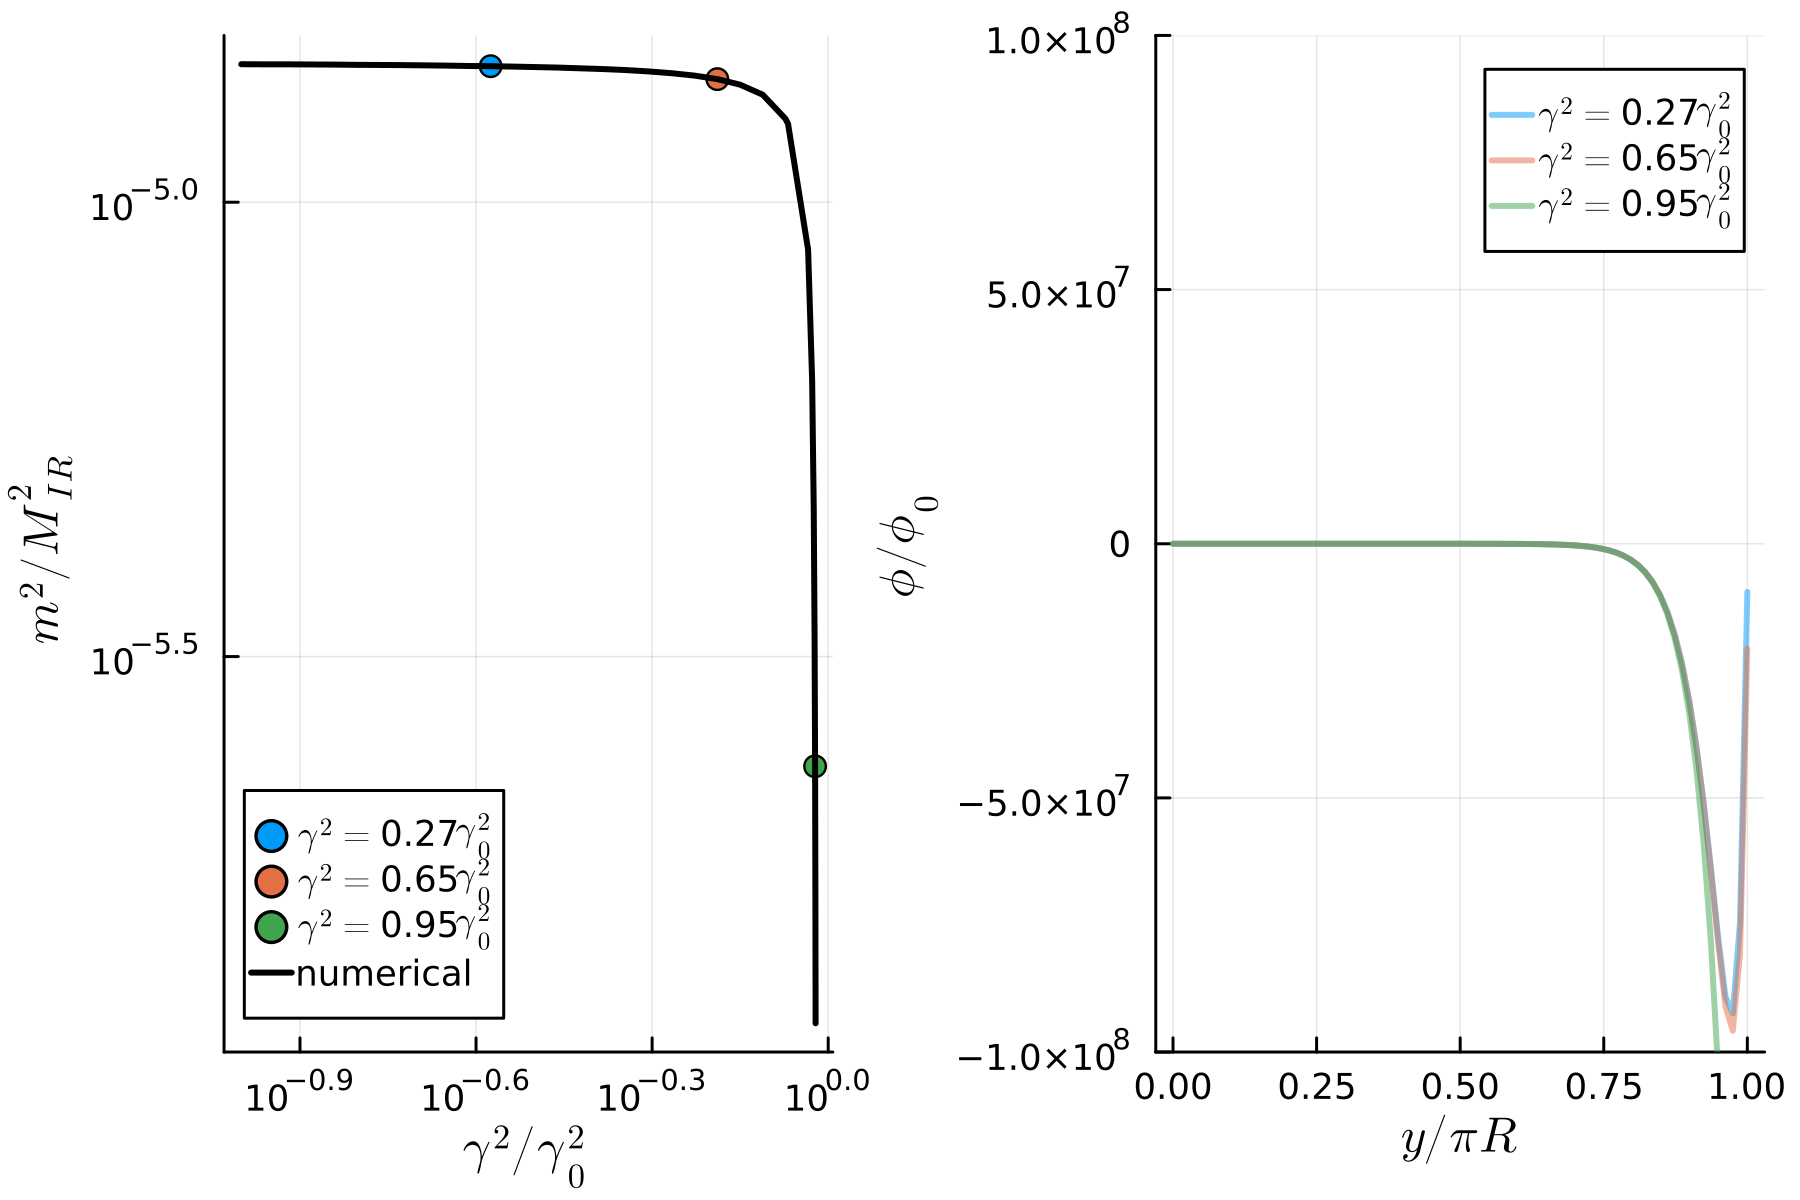

In [118]:
f1 = scatter()
f2 = plot(xlabel = L"y/\pi R", ylabel = L"\phi/\phi_0")
for (g2s, m2s) in g2_m2
    inds = findall(x-> 0.25eom.γ²₀ < x < 10eom.γ²₀, g2s)[1:10:end]
    
    for i in inds
        scatter!(f1, [g2s[i]/eom.γ²₀], [m2s[i]/eom.M_IR^2], label = L"\gamma^2="*string(round(g2s[i]/eom.γ²₀, digits=2))*L"\gamma_0^2")
        φ(x) = getφ(m2s[i], 1e-3, g2s[i])(x)
        plot!(f2, x-> (φ(π*x)+eom.ϕ0(π*x))/eom.ϕP, range(0,1,80), label = L"\gamma^2="*string(round(g2s[i]/eom.γ²₀, digits=2))*L"\gamma_0^2", lw=2, alpha=0.5, ylim=(-1e8,1e8))
    end
end
plot!(f1, g2_m2[1]./[eom.γ²₀, eom.M_IR^2]..., label = "numerical", xlabel = L"\gamma^2/\gamma^2_0", ylabel = L"m^2/M_{IR}^2",  xaxis=:log10, lw=2, c=:black, yaxis=:log10)
# plot!(f1, g2_m2[2]./[eom.γ²₀, eom.M_IR^2]..., label = nothing, lw=2, c=:black)
# plot!(f1, g2_m_perturb(1e-3, (log10(eom.γ²₀)*(1+1e-3), 4))./[eom.γ²₀, eom.M_IR]..., label = "perturbative", lw=2, c=:black, ls=:dash)
f = plot!(f1, f2, layout = (1,2), dpi=300)
display(f)